Task 05
Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors. 

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df=pd.read_csv("./US_Accidents_Dec20_Updated.csv") #Reading csv file

C:\Users\Sneha Chhatri\AppData\Local\Temp\ipykernel_12400\3858423092.py:1: DtypeWarning: Columns (30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("./US_Accidents_Dec20_Updated.csv") #Reading csv file


In [37]:
df


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.00,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.00,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.40,Stationary traffic on CA-17 from Summit Rd (CA...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.00,Accident on US-395 Southbound at Topsy Ln.,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.00,Accident on I-595 Westbound at Exit 4 / Pine I...,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42763,A-42764,3,2020-12-30 19:36:37,2020-12-30 20:38:55,40.696529,-73.980995,40.696529,-73.980995,0.00,One lane blocked due to accident on I-278 Broo...,...,False,False,False,False,False,False,Night,Night,Night,Night
42764,A-42765,2,2018-11-15 18:44:34,2018-11-15 19:29:24,30.485668,-91.068474,30.485668,-91.068474,0.00,Accident on Rocky Mountain Dr at Sunny Cline Dr.,...,False,False,False,False,False,False,Night,Night,Night,Night
42765,A-42766,3,2016-12-03 03:55:19,2016-12-03 04:24:58,34.051037,-118.213913,NaN,NaN,0.01,Slow lane blocked due to accident on I-5 North...,...,False,False,False,False,False,False,Night,Night,Night,Night
42766,A-42767,2,2019-05-03 09:59:04,2019-05-03 10:58:33,30.170256,-92.065056,30.170256,-92.065056,0.00,Accident on LA-3073 Ambassador Caffery Pkwy at...,...,False,False,False,False,False,False,Day,Day,Day,Day


In [38]:
df.head()


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,...,False,False,False,False,True,False,Day,Day,Day,Day


In [39]:
df.columns


Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [40]:
df.dtypes.value_counts()


object     33
float64    13
int64       1
dtype: int64

In [41]:
df.shape

(42768, 47)

In [42]:
df.describe()


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,42768.000000,42768.000000,42767.000000,38562.000000,38562.000000,42767.000000,14888.000000,41785.000000,25171.000000,41728.000000,41928.000000,41718.000000,38250.000000,23564.000000
mean,2.289632,36.495281,-96.397656,36.474763,-96.128667,0.395864,6686.169130,61.049345,55.007914,65.188363,29.658250,9.133120,7.855014,0.010956
std,0.555169,4.997337,17.744411,4.995932,17.633613,1.608695,14504.608766,18.413176,22.212886,22.866381,0.907478,2.818903,5.267950,0.139378
min,1.000000,24.574811,-124.486270,24.571389,-124.486270,0.000000,1.000000,-23.800000,-41.600000,2.000000,20.270000,0.000000,0.000000,0.000000
25%,2.000000,33.631295,-117.810017,33.603940,-117.658536,0.000000,933.000000,49.000000,39.000000,49.000000,29.590000,10.000000,4.600000,0.000000
50%,2.000000,36.069109,-91.192314,36.019261,-91.060528,0.000000,3016.000000,63.000000,58.000000,68.000000,29.920000,10.000000,7.000000,0.000000
75%,3.000000,40.316956,-80.843825,40.268014,-80.824167,0.288000,7990.250000,75.000000,72.000000,84.000000,30.070000,10.000000,10.400000,0.000000
max,4.000000,48.997581,-68.365955,48.997581,-68.365405,148.360001,851799.000000,117.000000,110.000000,100.000000,31.120000,80.000000,232.000000,9.990000


In [43]:
df.isnull().sum()

ID                           0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    1
End_Lat                   4206
End_Lng                   4206
Distance(mi)                 1
Description                  1
Number                   27880
Street                       1
Side                         1
City                         5
County                       1
State                        1
Zipcode                     14
Country                      1
Timezone                    46
Airport_Code                93
Weather_Timestamp          682
Temperature(F)             983
Wind_Chill(F)            17597
Humidity(%)               1040
Pressure(in)               840
Visibility(mi)            1050
Wind_Direction             925
Wind_Speed(mph)           4518
Precipitation(in)        19204
Weather_Condition         1057
Amenity                      1
Bump                         1
Crossing

In [44]:
df=df.dropna(subset=['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Direction', 'Wind_Speed(mph)',
                      'Precipitation(in)'])

In [45]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.000,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.000,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.400,Stationary traffic on CA-17 from Summit Rd (CA...,...,False,False,False,False,False,False,Night,Night,Night,Night
6,A-7,4,2019-12-12 09:48:52,2019-12-12 10:18:05,39.523970,-107.777000,39.565780,-107.516950,14.153,Closed between CO-13/Taughenbaugh Blvd/Exit 90...,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,2,2019-12-21 23:59:00,2019-12-22 00:32:06,34.034017,-118.026972,34.034017,-118.026972,0.000,At CA-60/Pomona Fwy - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42755,A-42756,2,2020-11-15 08:58:00,2020-11-15 12:03:53,34.281192,-118.175313,34.286742,-118.180683,0.491,Incident on ANGELES FOREST HWY near MM 23 Driv...,...,False,False,False,False,False,False,Day,Day,Day,Day
42757,A-42758,2,2020-10-11 11:57:08,2020-10-11 14:42:08,46.633325,-96.831403,46.655705,-96.831093,1.546,Incident on I-29 NB near MP 49 Expect delays.,...,False,False,False,False,False,False,Day,Day,Day,Day
42761,A-42762,2,2019-10-23 11:13:31,2019-10-23 12:44:32,35.818359,-78.268799,35.818359,-78.268799,0.000,Accident on NC-39 at Old Us-264.,...,False,False,False,False,False,False,Day,Day,Day,Day
42763,A-42764,3,2020-12-30 19:36:37,2020-12-30 20:38:55,40.696529,-73.980995,40.696529,-73.980995,0.000,One lane blocked due to accident on I-278 Broo...,...,False,False,False,False,False,False,Night,Night,Night,Night


<AxesSubplot:>

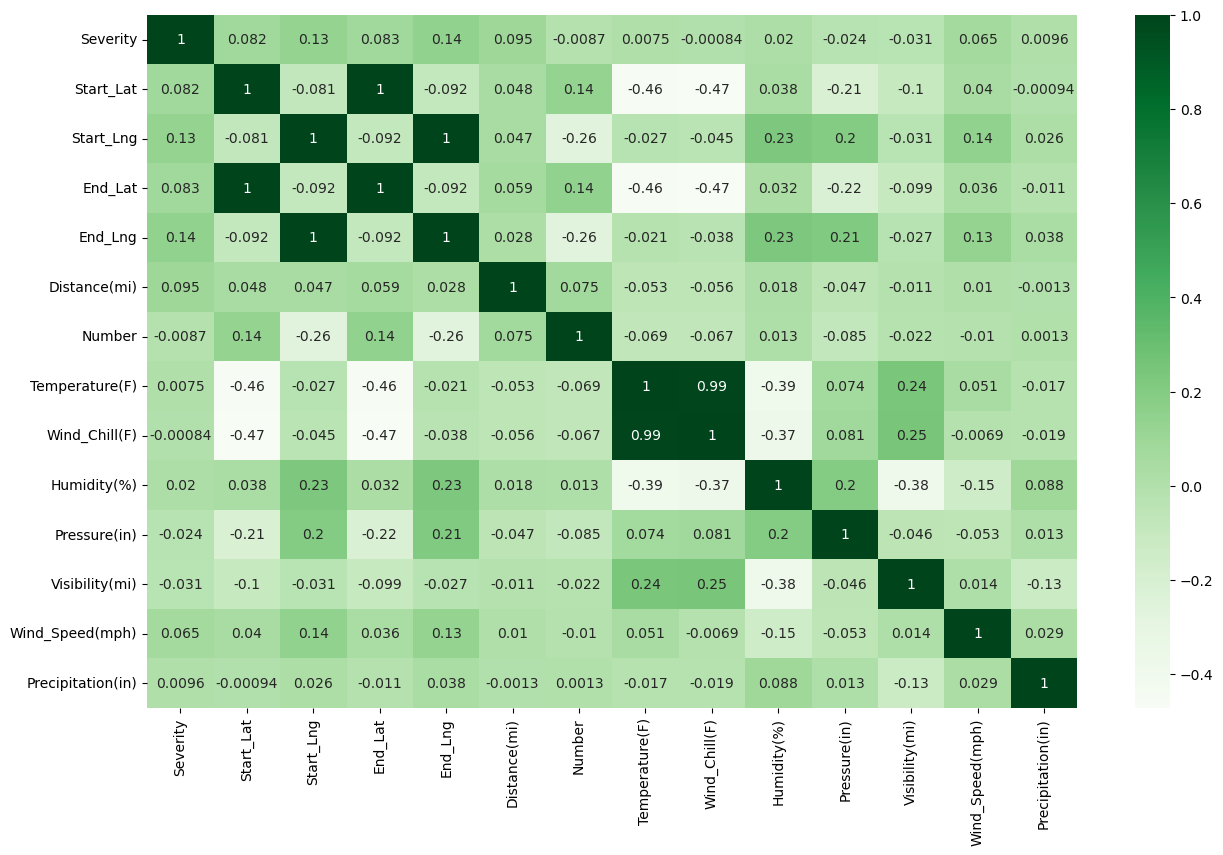

In [46]:
plt.figure(figsize=(15 ,9))
sns.heatmap(df.corr() , annot=True,cmap="Greens")


In [47]:
# Convert 'Start_Time' and 'End_Time' columns to datetime objects
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

# Extract date and time components separately
df['start_date'] = df['Start_Time'].dt.date
df['start_time'] = df['Start_Time'].dt.time
df['end_date'] = df['End_Time'].dt.date
df['end_time'] = df['End_Time'].dt.time


C:\Users\Sneha Chhatri\AppData\Local\Temp\ipykernel_12400\4108872705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Start_Time'] = pd.to_datetime(df['Start_Time'])
C:\Users\Sneha Chhatri\AppData\Local\Temp\ipykernel_12400\4108872705.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['End_Time'] = pd.to_datetime(df['End_Time'])
C:\Users\Sneha Chhatri\AppData\Local\Temp\ipykernel_12400\4108872705.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

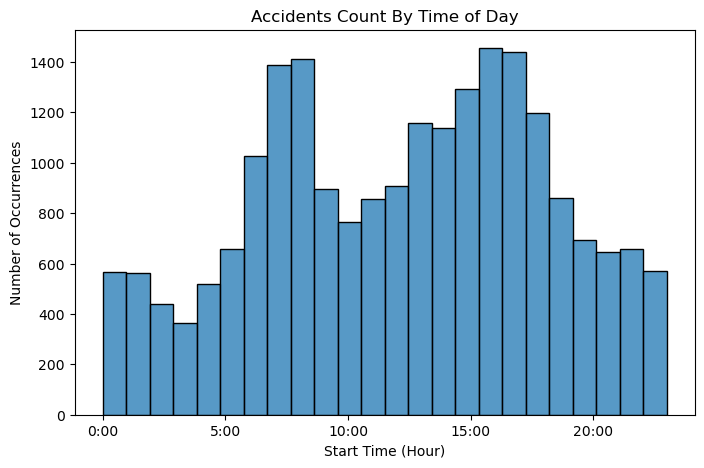

In [48]:
# Plotting histogram of accidents by the hour of the day
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(df['Start_Time'].dt.hour, bins=24)

plt.xlabel("Start Time (Hour)")
plt.ylabel("Number of Occurrences")
plt.title('Accidents Count By Time of Day')

hours = range(0, 24, 5)  # Define the hours for labeling
ax.set_xticks(hours)  # Set the tick positions
ax.set_xticklabels([f"{hour}:00" for hour in hours])  # Set the labels

plt.show()


It's notable that accidents demonstrate a pronounced tendency to occur during office hours, particularly between 8:00 to 10:00 in the morning and 16:00 to 18:00 in the evening. This observed pattern might be attributed to the higher volume of vehicles on the road during these times, aligning with the typical commuting periods for individuals heading to and returning from work.

In [49]:
accidents_by_cities = df['City'].value_counts()
accidents_by_cities


Los Angeles       474
Miami             468
Houston           371
Charlotte         364
Dallas            353
                 ... 
Perham              1
Minnesota Lake      1
Buda                1
Alva                1
Killingworth        1
Name: City, Length: 3383, dtype: int64

In [50]:
#top 10 cities by number of accident
accidents_by_cities[:10]

Los Angeles    474
Miami          468
Houston        371
Charlotte      364
Dallas         353
Raleigh        226
Orlando        214
Nashville      197
Austin         194
Baton Rouge    192
Name: City, dtype: int64

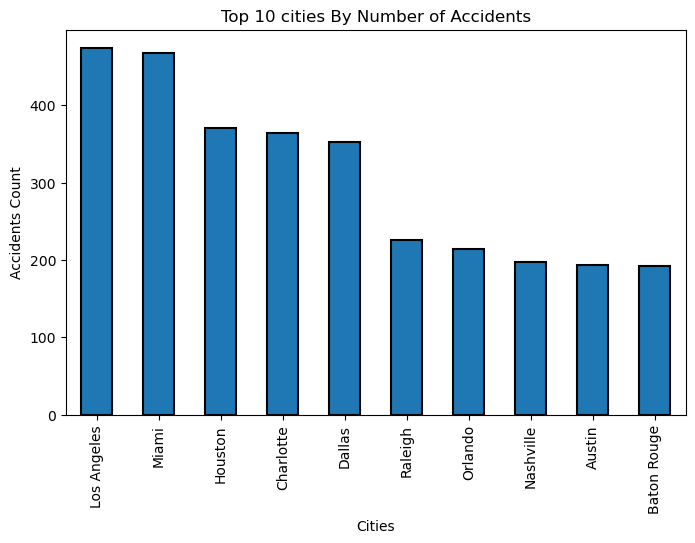

In [51]:
fig, ax = plt.subplots(figsize=(8,5))
accidents_by_cities[:10].plot(kind='bar',edgecolor='black', linewidth=1.5)
ax.set(title = 'Top 10 cities By Number of Accidents',
       xlabel = 'Cities',
       ylabel = 'Accidents Count')
plt.show()

Cities renowned for their high population density, such as Los Angeles, often face a higher likelihood of experiencing traffic accidents compared to cities like Austin and Raleigh. This increased occurrence can be attributed to various factors, including the greater volume of vehicles, intricate road networks, heightened commuter traffic, and bustling urban lifestyles prevalent in densely populated areas.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


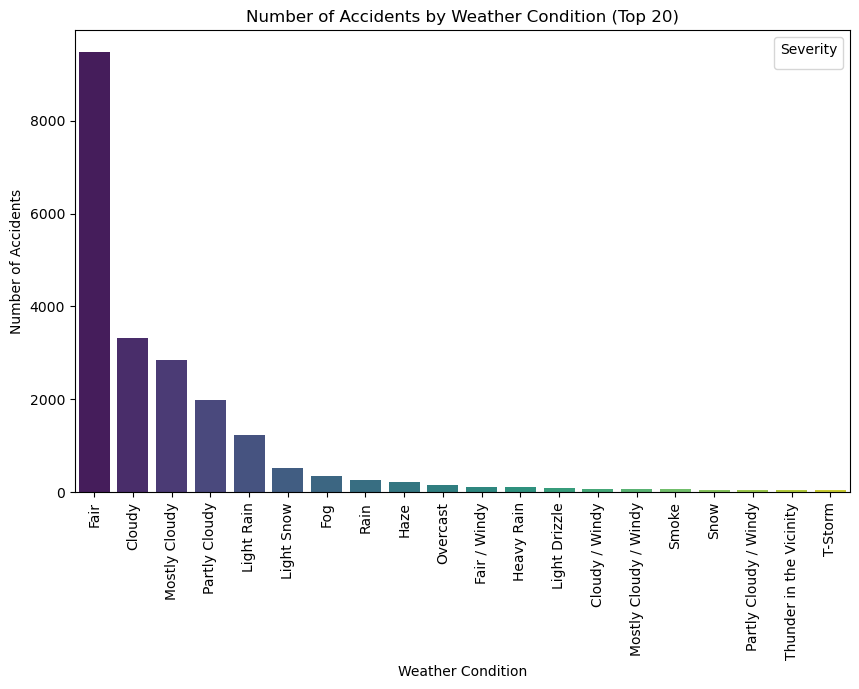

In [52]:
weather_count = df['Weather_Condition'].value_counts().sort_values(ascending=False)
# Plotting the number of accidents for each weather condition (top 20)
plt.figure(figsize=(10, 6))
sns.barplot( x=weather_count.head(20).index,y=weather_count.head(20), palette='viridis')
# Setting labels and title
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Weather Condition (Top 20)')
plt.xticks(rotation=90)
plt.legend(title='Severity')

plt.show()

It's notable that a significant portion of accidents occurred when the weather conditions were reported as 'fair'. This observation suggests that adverse weather conditions might not have been a predominant contributing factor to these incidents.

C:\Users\Sneha Chhatri\AppData\Local\Temp\ipykernel_12400\1081563724.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Severity_Labels'] = df['Severity'].map(severity_labels)


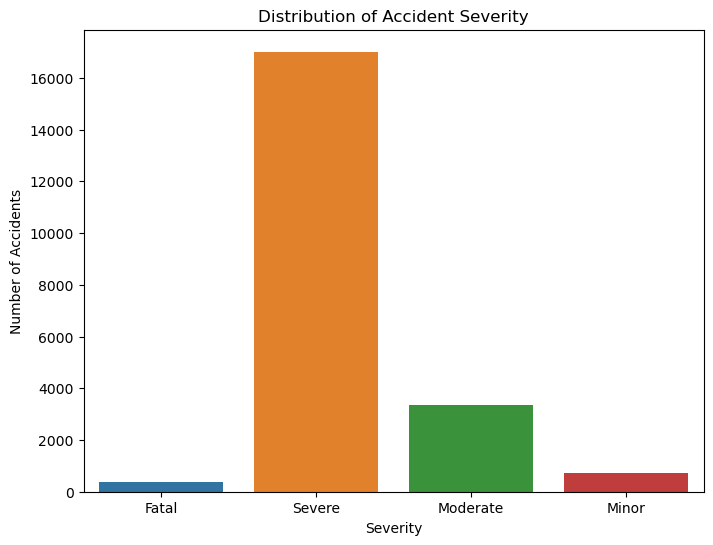

In [53]:
severity_labels = {
    1: 'Fatal',
    2: 'Severe',
    3: 'Moderate',
    4: 'Minor'
}
# Replace numeric severity values with their word labels
df['Severity_Labels'] = df['Severity'].map(severity_labels)

# Plotting the count of accident severity with word labels
plt.figure(figsize=(8, 6))

sns.countplot(x='Severity_Labels', data=df, order=['Fatal', 'Severe', 'Moderate', 'Minor'])
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.show()

The majority of accidents lean towards being categorized as severe in nature, emphasizing the considerable prevalence and concerning impact of these incidents.

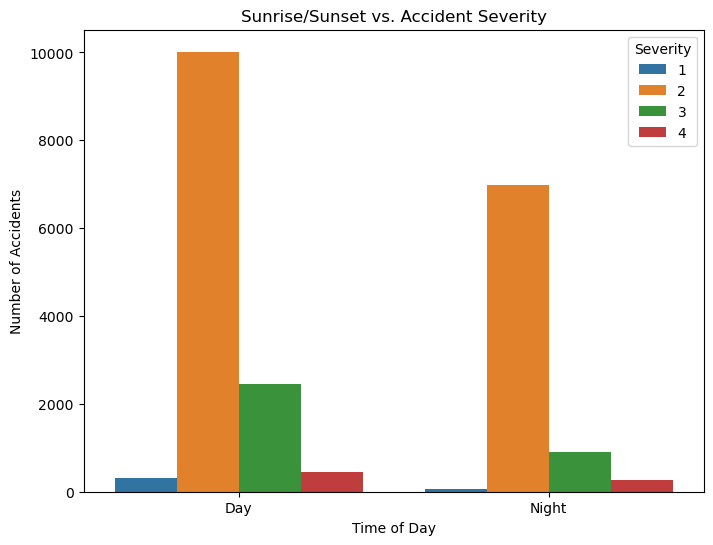

In [54]:
# Analyzing Time of Day - Sunrise/Sunset vs. Accident Severity

plt.figure(figsize=(8, 6))
sns.countplot(x='Sunrise_Sunset', hue='Severity', data=df)
plt.title('Sunrise/Sunset vs. Accident Severity')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity')
plt.show()

Compared to nighttime, a notably higher frequency of accidents occurred during the daytime. This observed trend indicates a greater propensity for accidents to take place during daylight hours.

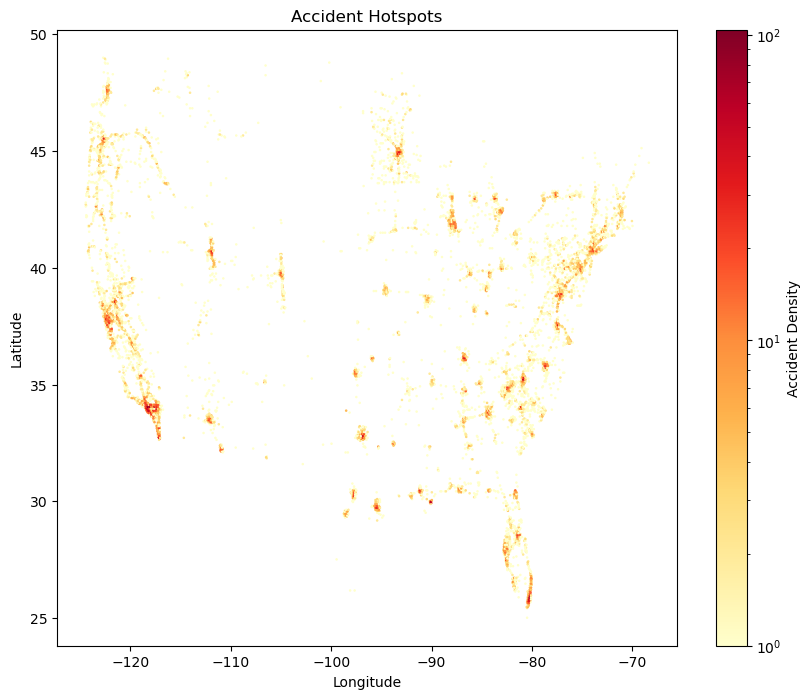

In [55]:
 # Visualizing Accident Hotspots - Heatmap
plt.figure(figsize=(10, 8))
plt.hexbin(df['Start_Lng'], df['Start_Lat'], gridsize=500, cmap='YlOrRd', bins='log')
plt.colorbar(label='Accident Density')
plt.title('Accident Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
